### Import Base Packages

In [ ]:
!pip install mglearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy.ma.core import masked_not_equal
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC
#from sklearn import datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=f0922a1cff45b2ef8cc0a1215745e26b9691bffea60c1b2cbeed143f0e0d75f8
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


## T1. Data 
A short description of the data can be found here (for our own understanding).

https://hastebin.com/eqomafehih.sql


Load and read Wine Quality Datasets

Two datasets
*   Red wine dataset
*   White wine dataset

Each dataset contains the exact same features. Alle the features are converted to floats. The target variable "Quality" is converted to int. The choice was made based on the .head(), .tail() methods and the dataset description.





In [ ]:
desc = {"volatile acidity":float, "fixed acidity":float, "citric acid":float,
        "residual sugar": float, "chlorides": float, "total sulfur dioxide": float,
        "free sulfur dioxide": float, "density": float, "pH": float,
        "sulphates": float, "alcohol": float, "quality": int}

drive.mount('/content/drive', force_remount=True)
wn_red = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 1/winequality-red.csv", sep=';', dtype=desc
                    )
wn_white = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 1/winequality-white.csv", sep=';',dtype = desc)

Mounted at /content/drive


### Exploring the data

In [ ]:
#Exploring how some of the data looks, first 5 rows in this case.
#However, we scrolled through all the data but will not print that.
wn_red.tail(5) #wn_white.tail(), ....


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [ ]:
wn_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Identify outliers according to the IQR-definition
Outliers were **not** removed from the model since this would have a significant effect on the outcome of the results. Furthermore the assignment did not explicitly 
state that this was necessary.

Note that the target variable Quality is **not** evenly distributed. A lot of the data is concentrated at quality 5 and 6. Therefore we will use K-Fold Cross-validation later on.

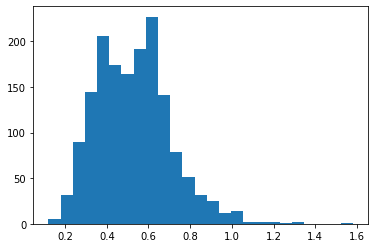

Not an outlier if in range [0.015, 1.015]


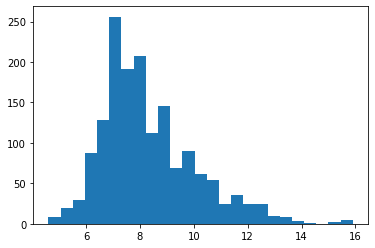

Not an outlier if in range [3.950, 12.350]


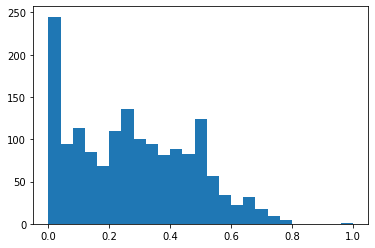

Not an outlier if in range [-0.405, 0.915]


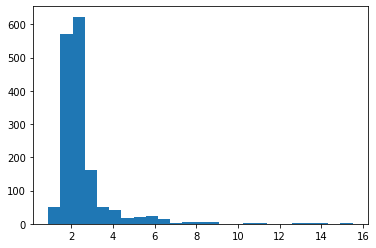

Not an outlier if in range [0.850, 3.650]


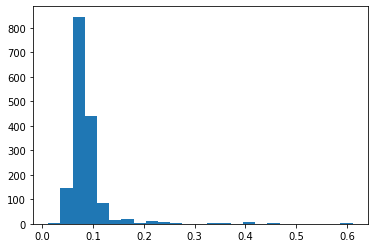

Not an outlier if in range [0.040, 0.120]


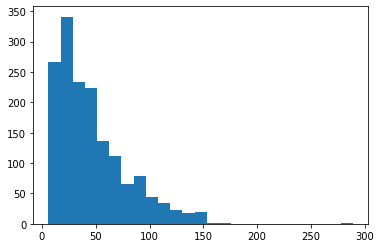

Not an outlier if in range [-38.000, 122.000]


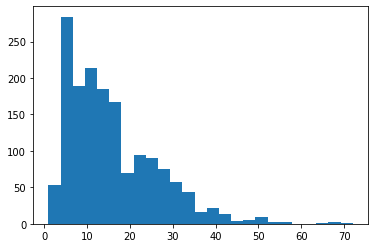

Not an outlier if in range [-14.000, 42.000]


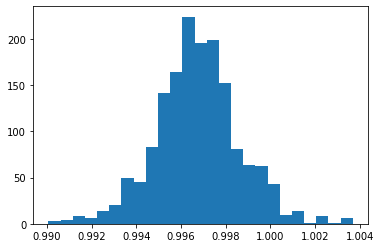

Not an outlier if in range [0.992, 1.001]


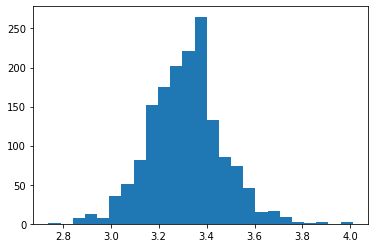

Not an outlier if in range [2.925, 3.685]


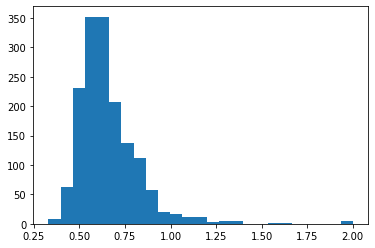

Not an outlier if in range [0.280, 1.000]


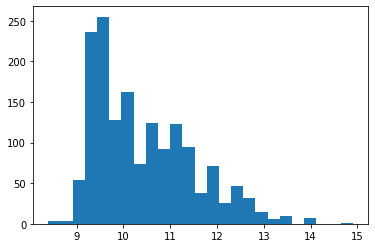

Not an outlier if in range [7.100, 13.500]


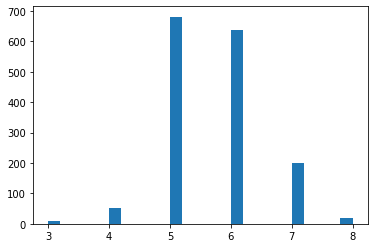

Not an outlier if in range [3.500, 7.500]


In [ ]:
 for col in desc:
  plt.hist(wn_red[col],bins = 25)
  plt.show()
  outlier_low = wn_red[col].quantile(.25) - 1.5 * (wn_red[col].quantile(.75) - wn_red[col].quantile(.25))
  outlier_high = wn_red[col].quantile(.75) + 1.5 * (wn_red[col].quantile(.75) - wn_red[col].quantile(.25))
  print(f"Not an outlier if in range [{outlier_low:.3f}, {outlier_high:.3f}]")

### Q1. Convert all features to an appropriate data type


The dataset is normalized using Min-max feature scaling.





In [ ]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm[col]=dataset[col]
    return dataNorm
norm_wn_red=normalize(wn_red)
norm_wn_white=normalize(wn_white)


### Distribution of the features and the target variable


* We use box plots 



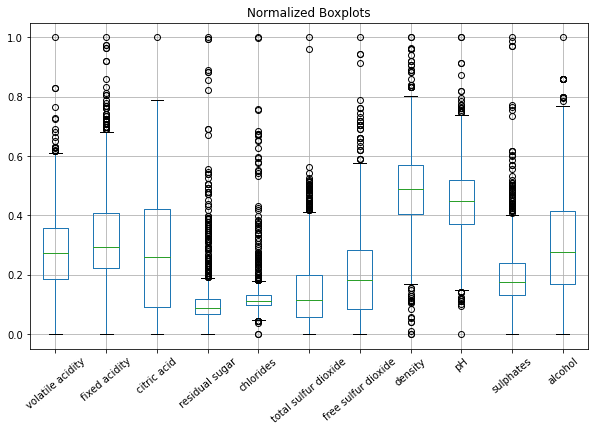

In [ ]:
bp1 = norm_wn_red.boxplot(column=['volatile acidity','fixed acidity','citric acid', 
                             'residual sugar','chlorides','total sulfur dioxide',
                             'free sulfur dioxide','density','pH','sulphates','alcohol'], figsize= (10,6),rot = 40).set(title="Normalized Boxplots")

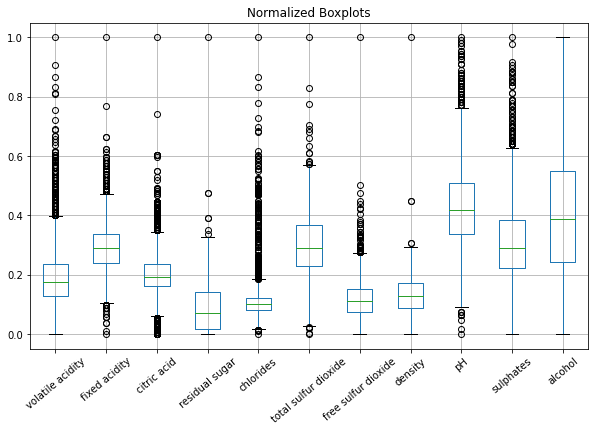

In [ ]:
bp2 = norm_wn_white.boxplot(column=['volatile acidity','fixed acidity','citric acid', 
                             'residual sugar','chlorides','total sulfur dioxide',
                             'free sulfur dioxide','density','pH','sulphates','alcohol'], figsize= (10,6),rot = 40).set(title="Normalized Boxplots")

### Check for correlations between different features

*   We use a scatter matrix plot
*   We use heatmap plot 


 







<Figure size 2160x1080 with 0 Axes>

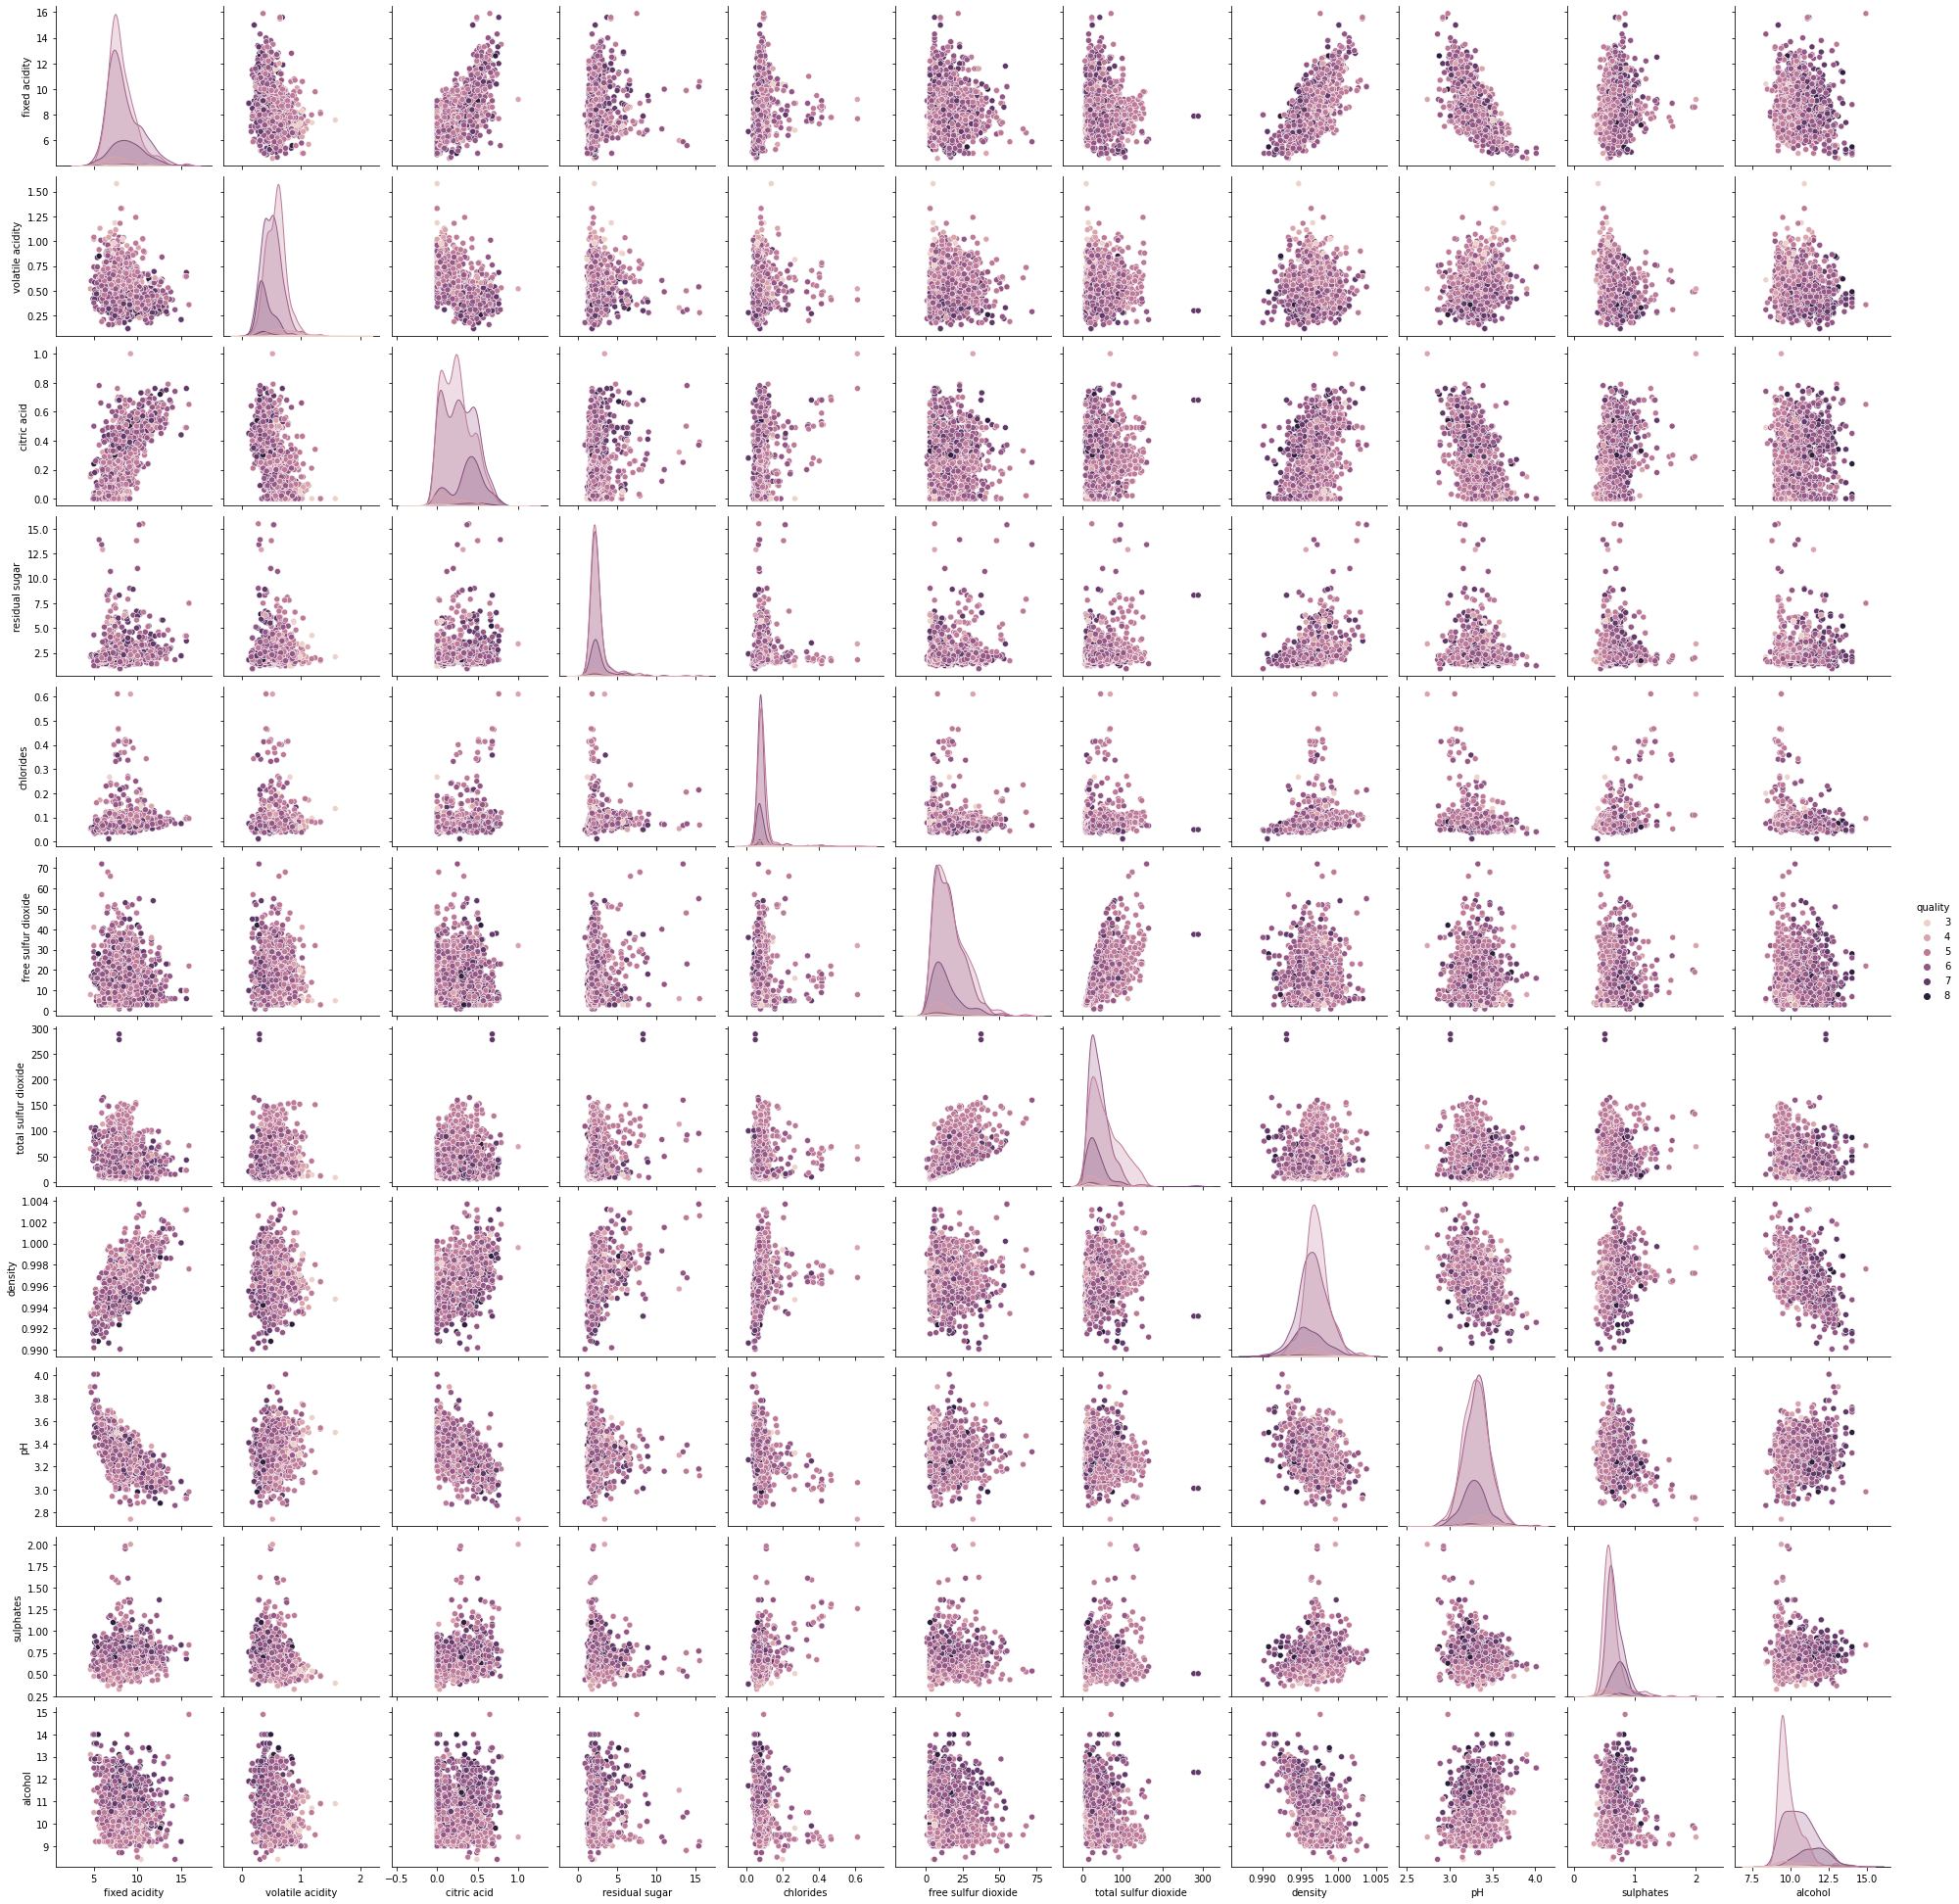

In [ ]:
plt.figure(figsize=(30,15))
sns.pairplot(data=wn_red, hue='quality')
plt.show()

<Figure size 2160x1080 with 0 Axes>

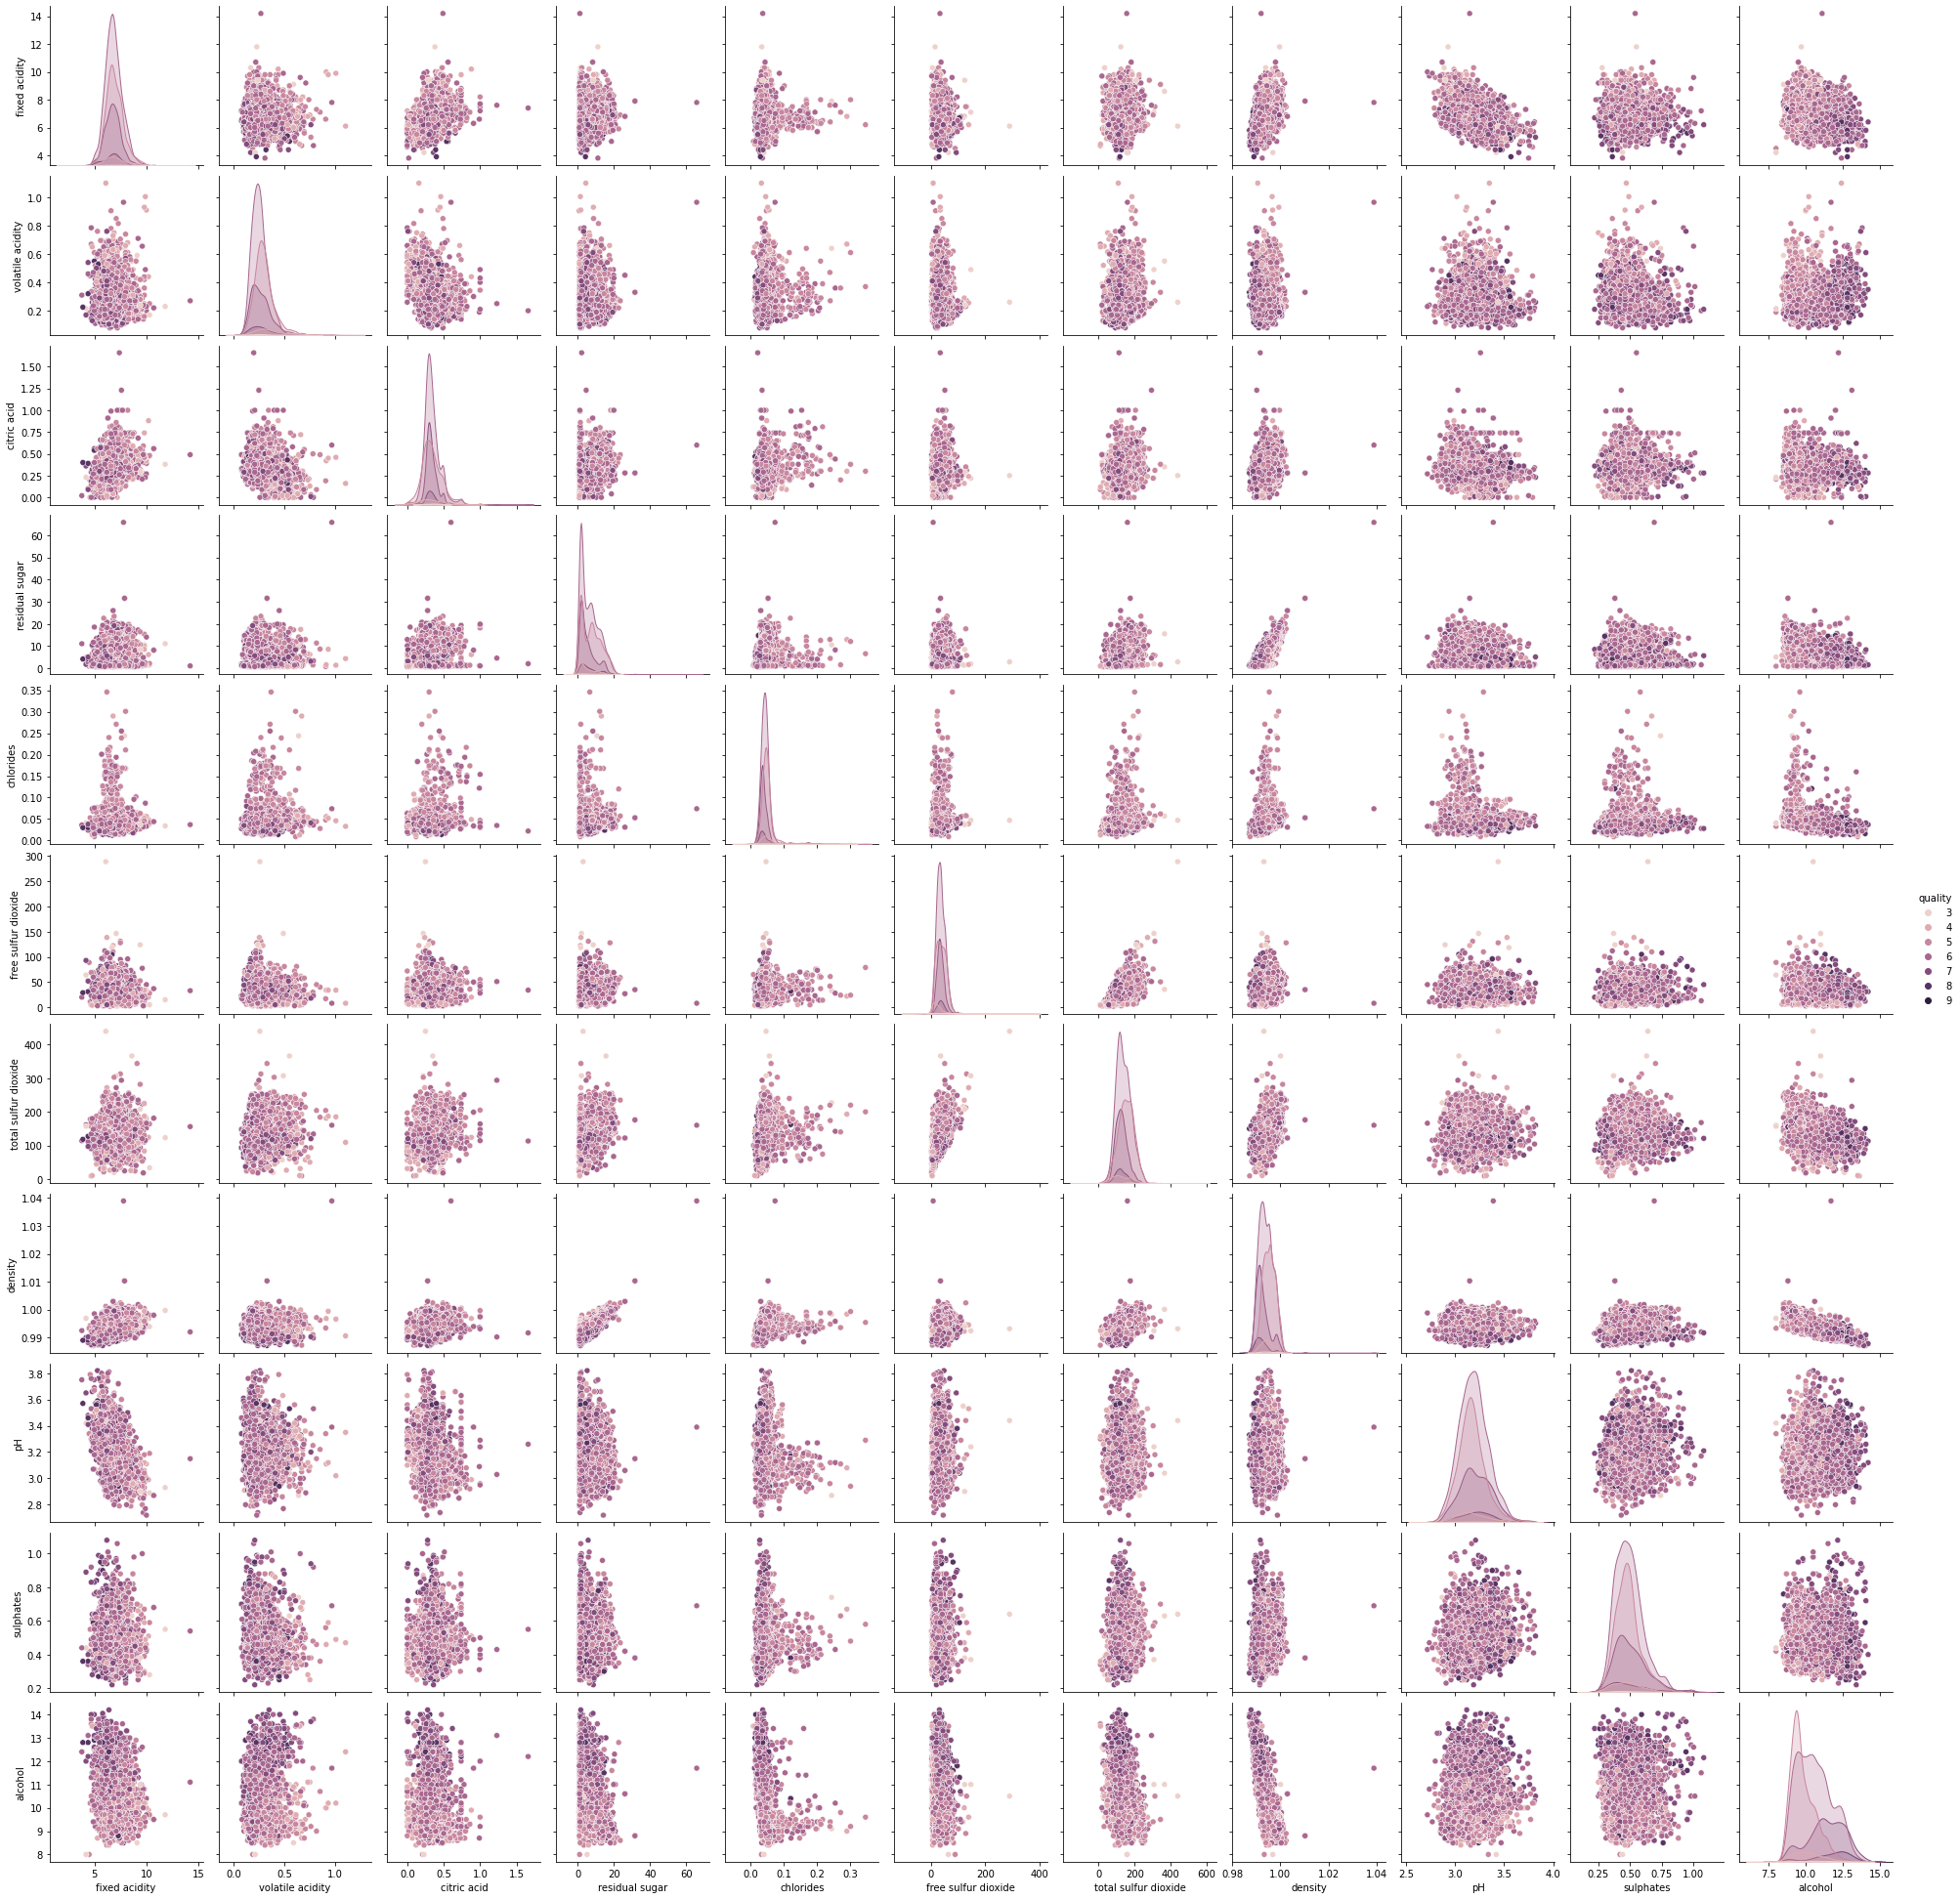

In [ ]:
plt.figure(figsize=(30,15))
sns.pairplot(data=wn_white, hue='quality')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

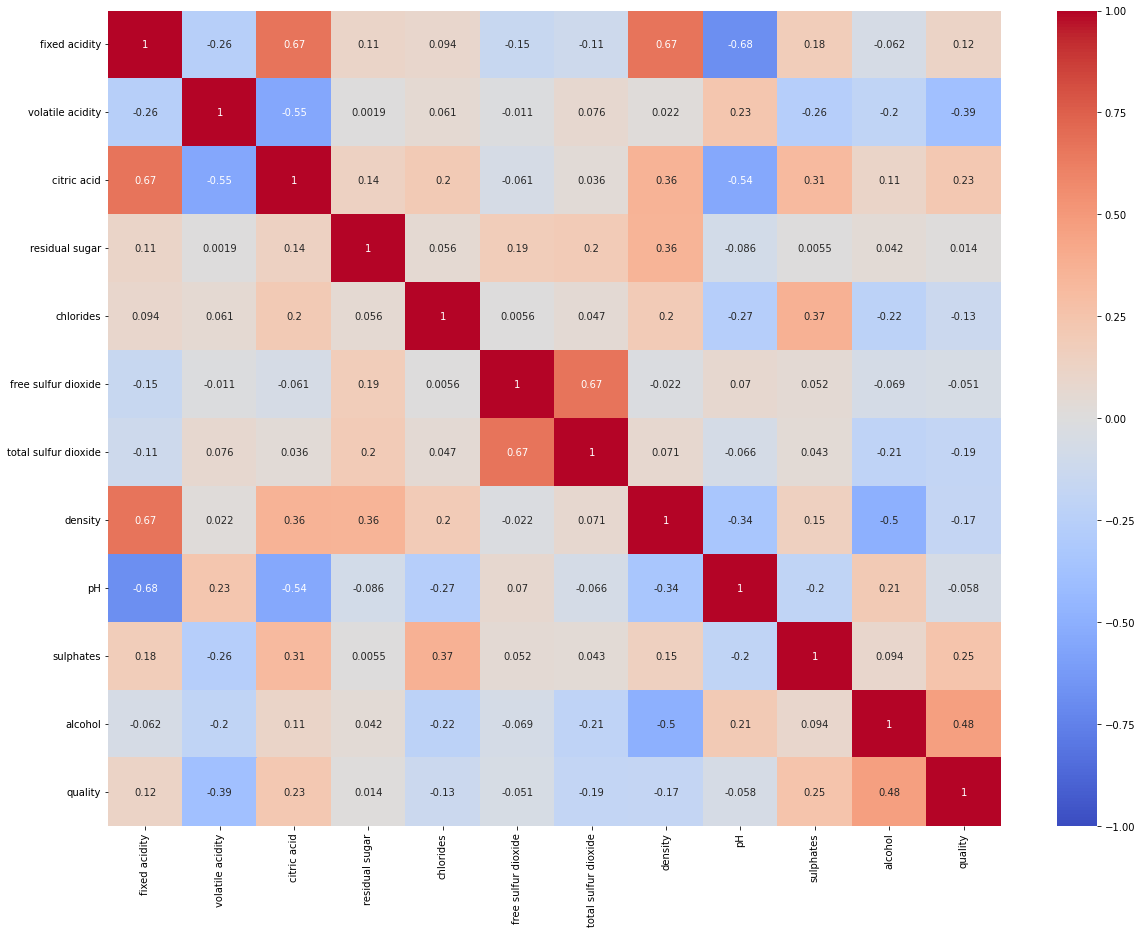

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(wn_red.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot= True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

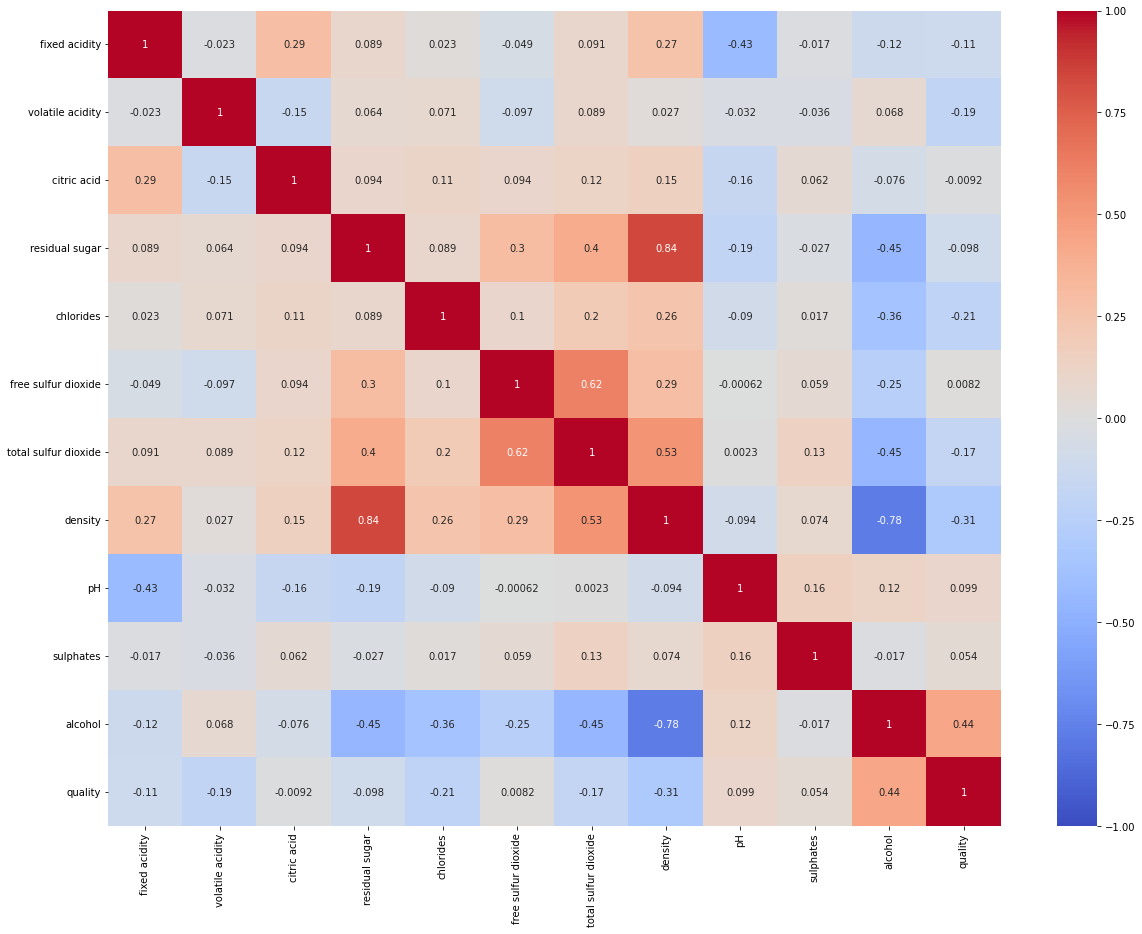

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(wn_white.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot= True)
plt.show

Results of Exploratory Data Analyasis:

From the plots above, we see that the highest to the lowest correlation in order to Quality are: Alcohol (0.48), Volatile Acidity (-0.39), Sulphates (0.25), Citric Acid (0.23), Total Sulfur Dioxide (-0.19), Density (-0.17), Chlorides (-0.13), Fixed Acidity (0.12), pH (-0.058), Free Sulfur Dioxide (-0.051), and Residual Sugar (0.014).

## T2 Closed-form OLS Solution

### OLS

Red wine|Training and test set

RED WINE DATA
The MSE for training set is 0.652797804315173
The MSE for test set is 0.6330721652189467
The MAE for training set is 0.7149837364677114
The MAE for test set is 0.6979442789071918
The R squared value for training set is 0.37096437294057616
The R squared value for test set is 0.32071124343219437
Intercept is 21.011050088278836
The set of coefficients are [-1.21385635e+00  2.02362546e-02 -9.84560496e-02  2.21024824e-02
 -1.89761853e+00 -3.00386885e-03  1.99433159e-03 -1.67249074e+01
 -3.97705407e-01  8.54179475e-01  2.67506351e-01]
Training set score: 0.37
Test set score: 0.32


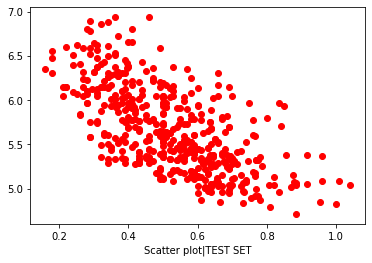

In [ ]:
X = wn_red[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]

Y = wn_red['quality']


X_train,X_test,Y_train, Y_test = train_test_split(X,Y,          
                                              random_state = 0,
                                              test_size = 0.3)
lr= LinearRegression().fit(X_train,Y_train)
pred_train_lr= lr.predict(X_train)
pred_test_lr= lr.predict(X_test)


mse_tr = np.sqrt(mean_squared_error(Y_train,pred_train_lr))
mse_te = np.sqrt(mean_squared_error(Y_test,pred_test_lr))
r2 = r2_score(Y_test, pred_test_lr)
mae_tr = np.sqrt(mean_absolute_error(Y_train,pred_train_lr))
mae_te = np.sqrt(mean_absolute_error(Y_test,pred_test_lr))

OLS = LinearRegression()
OLS.fit(X_train,Y_train)
y_train_pred1 = OLS.predict(X_test)
plt.scatter(X_test.iloc[:,0].values, y_train_pred1, color='r')
plt.xlabel("Scatter plot|TEST SET")


print("RED WINE DATA")
print("The MSE for training set is " + str(mse_tr))
print("The MSE for test set is " + str(mse_te))
print("The MAE for training set is " + str(mae_tr))
print("The MAE for test set is " + str(mae_te))
print("The R squared value for training set is " + str(OLS.score(X_train,Y_train)))
print("The R squared value for test set is " + str(r2))
print("Intercept is " + str(OLS.intercept_))
print("The set of coefficients are " + str(OLS.coef_))
print("Training set score: {:.2f}".format(lr.score(X_train,Y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,Y_test)))

White wine|Training and test set

WHITE WINE DATA
The MSE for training set is 0.739323752367705
The MSE for test set is 0.7797679548206528
The MAE for training set is 0.7576296453636205
The MAE for test set is 0.7800652044451115
The R squared value for training set is 0.2923542841065312
The R squared value for test set is 0.2481566258755945
Intercept is 200.28325185618309
The set of coefficients are [-1.80466188e+00  1.15989956e-01 -1.50084077e-02  9.67717990e-02
 -4.22336380e-01 -2.40509546e-04  5.11799045e-03 -2.01070812e+02
  8.69262672e-01  6.58085048e-01  1.28438281e-01]
Training set score: 0.29
Test set score: 0.25


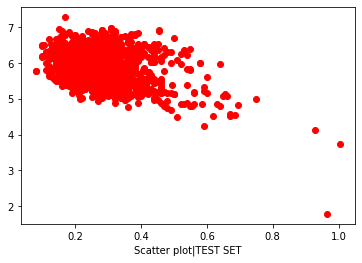

In [ ]:
X = wn_white[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
Y = wn_white['quality']


X_train,X_test,Y_train, Y_test = train_test_split(X,Y,
                                                    random_state = 0,
                                                 test_size = 0.3)
lr= LinearRegression().fit(X_train,Y_train)
OLS = LinearRegression()
OLS.fit(X_train,Y_train) 
pred_train_lr= lr.predict(X_train)
pred_test_lr= lr.predict(X_test)

mse_tr = np.sqrt(mean_squared_error(Y_train,pred_train_lr))
mse_te = np.sqrt(mean_squared_error(Y_test,pred_test_lr))
mae_tr = np.sqrt(mean_absolute_error(Y_train,pred_train_lr))
mae_te = np.sqrt(mean_absolute_error(Y_test,pred_test_lr))
r2 = r2_score(Y_test, pred_test_lr)

y_train_pred1 = OLS.predict(X_test)
plt.scatter(X_test.iloc[:,0].values, y_train_pred1, color='r')
plt.xlabel("Scatter plot|TEST SET")

print("WHITE WINE DATA")
print("The MSE for training set is " + str(mse_tr))
print("The MSE for test set is " + str(mse_te))
print("The MAE for training set is " + str(mae_tr))
print("The MAE for test set is " + str(mae_te))
print("The R squared value for training set is " + str(OLS.score(X_train,Y_train)))
print("The R squared value for test set is " + str(r2))
print("Intercept is " + str(OLS.intercept_))
print("The set of coefficients are " + str(OLS.coef_))
print("Training set score: {:.2f}".format(lr.score(X_train,Y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,Y_test)))

Closed form OLS solution|make_regression


*   Below we plotted a scatter of the features and targets



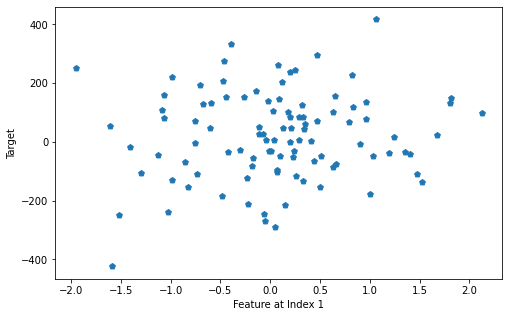

Intercept: -5.329070518200751e-15
Coefficients: [45.47398556338593, -1.0658141036401503e-14, 30.792994159119075, 48.884658025692, 2.997358987267784, 66.68642575461044, 67.3432433324918, 70.4680762736647, 51.559602857925015, 13.965125475631286, 20.18534521229485]


In [ ]:
X, y = make_regression(
    n_samples=100,
    n_features=11,
    random_state=42
    )
plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 1], y, marker='p')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")
plt.show()

X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept, *coef = theta_best
print(f"Intercept: {intercept}\n\
Coefficients: {coef}")

## T3 Wine Quality Regression

### Ridge regression Red Wine

In [ ]:
n_samples, n_features = 10, 5
X = wn_red[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
y = wn_red['quality']

X_train,X_test,Y_train, Y_test = train_test_split(X,y,
                                              random_state = 0)    

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, Y_train)
pred_train_rr= model_ridge.predict(X_train)
pred_test_rr= model_ridge.predict(X_test)

print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_rr))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_rr)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_rr)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_rr)))

MSE 0.6515178532725543
MAE 0.5106439369703604
R^2|Train 0.3618266923563306
R^2|Test 0.3448153822159903


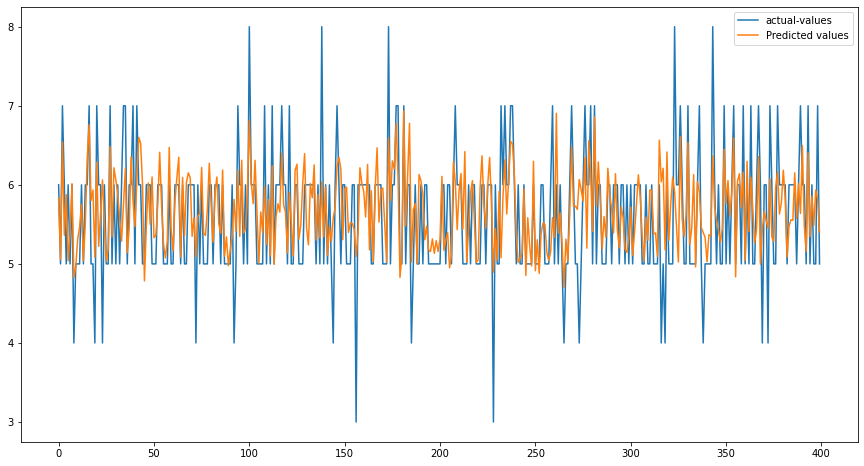

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual-values")
plt.plot([i for i in range(len(Y_test))],pred_test_rr, label="Predicted values")
plt.legend()
plt.show()

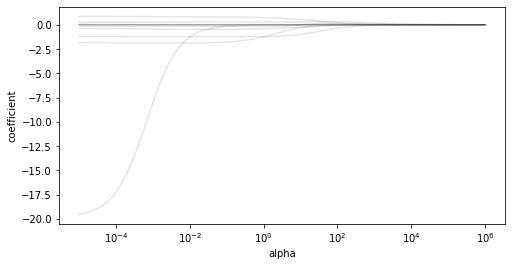

In [ ]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")
plt.ylim=([-5,5])
plt.show()

Ridge|Alpha values comparasion
Below graph shows that higher values of alpha makes R^2 smaller

Text(0, 0.5, 'R^2')

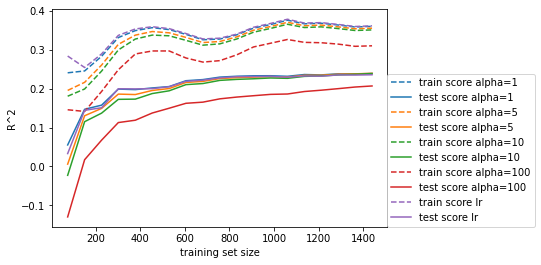

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=5), "alpha=5")
plot_learning_curve(Ridge(alpha=10), "alpha=10")
plot_learning_curve(Ridge(alpha=100), "alpha=100")
plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

Ridge Regression|GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,0.1]}
ridge_regressor = GridSearchCV(ridge,parameters)
ridge_regressor.fit(X_train,Y_train)

print("GridSearchCV on training set")
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

GridSearchCV on training set
{'alpha': 0.1}
0.3317367203956662


Ridge|Tunned model

MSE 0.6509688613847453
MAE 0.5099819463416139
R^2|Train 0.3629017338389232
R^2|Test 0.3451884877134057


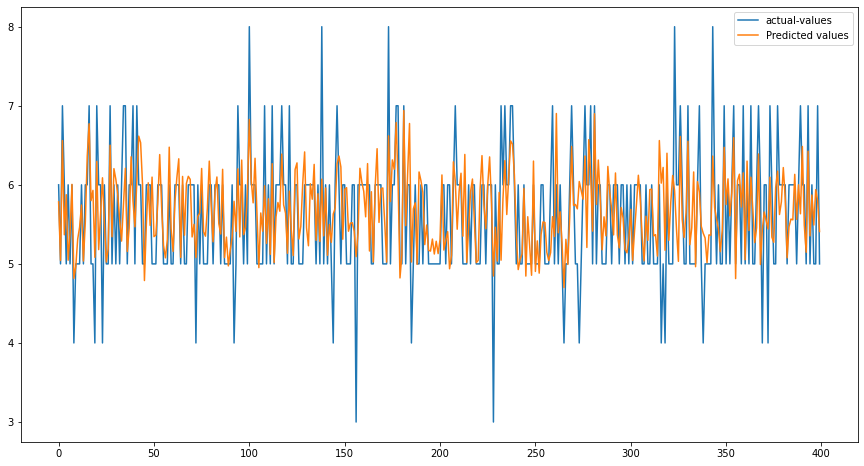

In [ ]:
model_ridge1 = Ridge(alpha = 0.1)
model_ridge1.fit(X_train, Y_train) 

pred_train_rrr= model_ridge1.predict(X_train)
pred_test_rrr= model_ridge1.predict(X_test)  
print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_rrr))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_rrr)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_rrr)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_rrr)))

plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual-values")
plt.plot([i for i in range(len(Y_test))],pred_test_rrr, label="Predicted values")
plt.legend()
plt.show()

### Ridge regression White Wine

In [ ]:
n_samples, n_features = 10, 5
X = wn_white[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
y = wn_white['quality']

X_train,X_test,Y_train, Y_test = train_test_split(X,y,
                                              random_state = 0)    

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, Y_train)
pred_train_rr= model_ridge.predict(X_train)
pred_test_rr= model_ridge.predict(X_test)

print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_rr))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_rr)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_rr)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_rr)))

MSE 0.7417870052729235
MAE 0.5763981886620398
R^2|Train 0.2810332462989509
R^2|Test 0.24288351322834978


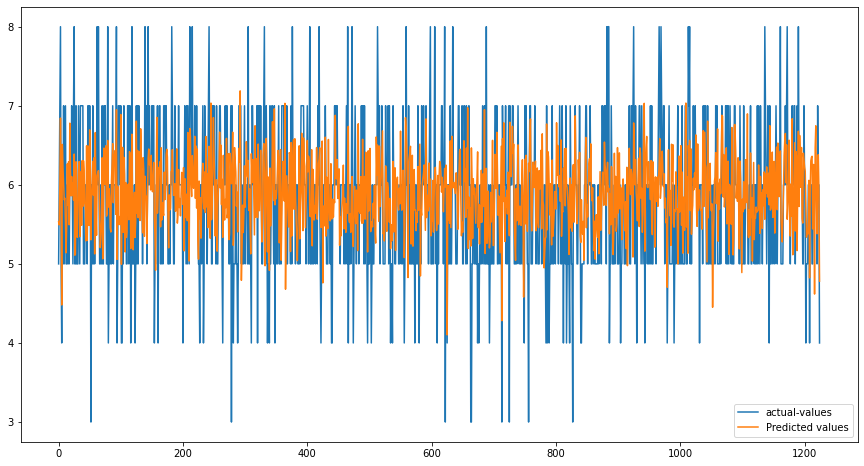

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual-values")
plt.plot([i for i in range(len(Y_test))],pred_test_rr, label="Predicted values")
plt.legend()
plt.show()

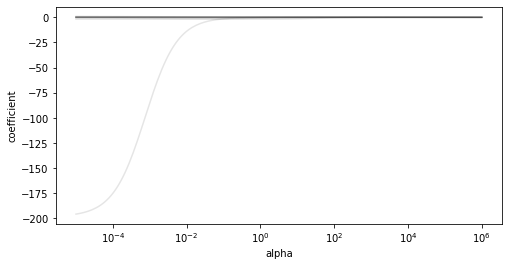

In [ ]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")
plt.ylim=([-5,5])
plt.show()

Ridge|Alpha values comparasion
Below graph shows that higher values of alpha makes R^2 smaller

Text(0, 0.5, 'R^2')

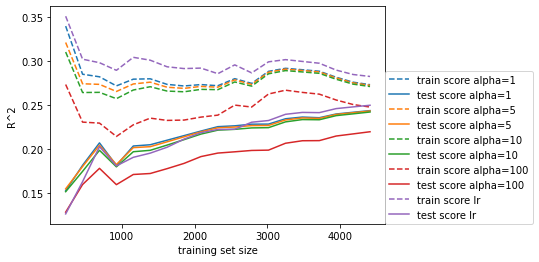

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=5), "alpha=5")
plot_learning_curve(Ridge(alpha=10), "alpha=10")
plot_learning_curve(Ridge(alpha=100), "alpha=100")
plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

Ridge Regression|GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,0.1]}
ridge_regressor = GridSearchCV(ridge,parameters)
ridge_regressor.fit(X_train,Y_train)

print("GridSearchCV on training set")
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

GridSearchCV on training set
{'alpha': 1e-08}
0.28304281510221013


Ridge|Tunned model

MSE 0.7362761607387311
MAE 0.5737023620191282
R^2|Train 0.2916761839983417
R^2|Test 0.24380080160945294


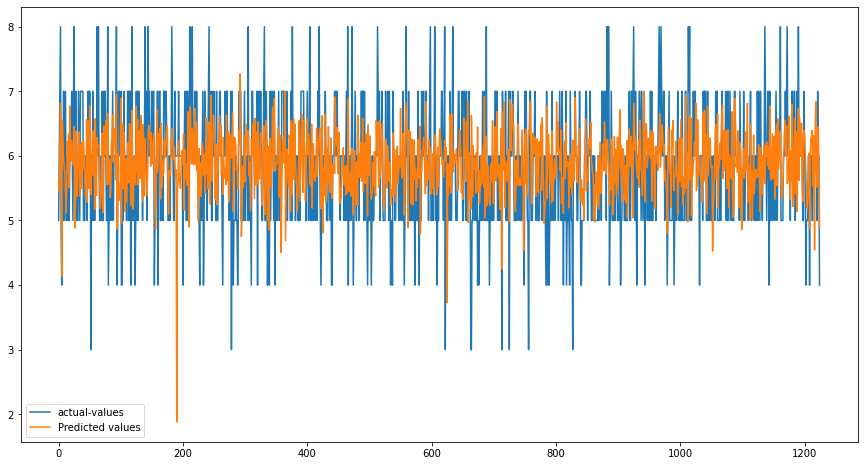

In [ ]:
model_ridge1 = Ridge(alpha = 1e-08)
model_ridge1.fit(X_train, Y_train) 

pred_train_rrr= model_ridge1.predict(X_train)
pred_test_rrr= model_ridge1.predict(X_test)  
print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_rrr))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_rrr)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_rrr)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_rrr)))

plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual-values")
plt.plot([i for i in range(len(Y_test))],pred_test_rrr, label="Predicted values")
plt.legend()
plt.show()

### Lasso Regression Red Wine

Visualized how the actual data values differs from the ones which we predicted.
With the value of alpha 1.0 the prediction is quite poor. Once we fit the vlaue after using GridSearchCV(0.001) the prediction is almost perfect.

Aboe this one we plotter graph of different alpha values with MSE.

In [ ]:
from sklearn.linear_model import LassoCV
n_samples, n_features = 10, 5
X = wn_red[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
y = wn_red['quality']
X_train,X_test,Y_train, Y_test = train_test_split(X,y,
                                              random_state = 0) 
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, Y_train)
pred_train_ll= model_lasso.predict(X_train)
pred_test_ll= model_lasso.predict(X_test)  
print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_ll))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_ll)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_ll)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_ll)))

MSE 0.8012917437362195
MAE 0.660646229093192
R^2|Train 0.03468883535504408
R^2|Test 0.02635767137719147


Lasso| Real and  predicted values comparasion


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.540e+02, tolerance: 7.975e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+02, tolerance: 7.975e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.448e+01, tolerance: 7.975e-02

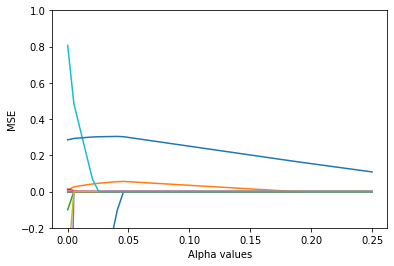

In [ ]:
alphas = np.linspace(0.0001,0.25)
lasso = Lasso(max_iter=5)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
ax = plt.gca(xlabel="Alpha values",ylabel="MSE",ylim=([-0.2,1]))
ax.plot(alphas, coefs)

Lasso|Alpha values comparasion

Text(0, 0.5, 'R^2')

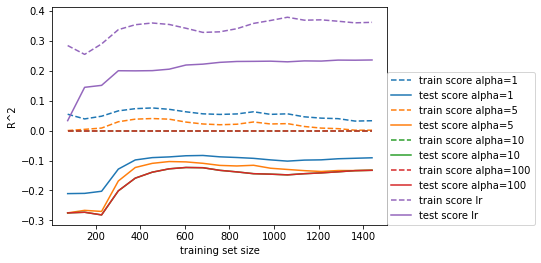

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Lasso(alpha=1), "alpha=1")
plot_learning_curve(Lasso(alpha=5), "alpha=5")
plot_learning_curve(Lasso(alpha=10), "alpha=10")
plot_learning_curve(Lasso(alpha=100), "alpha=100")
plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

Lasso|GridSearchCV

In [ ]:
lasso = Lasso()
parameters1 = {'alpha':[1e-15,13-10,1e-8,1e-3,1e-2,1e-1,1,2,5]}
lasso_regressor = GridSearchCV(lasso,parameters1,return_train_score=True)
lasso_regressor.fit(X_train,Y_train)


print("GridSearchCV on training set")
print(str(lasso_regressor.best_params_))
print(lasso_regressor.best_score_)

GridSearchCV on training set
{'alpha': 0.001}
0.33125221003766586


Lasso|Tunned model

In [ ]:
model_lasso1 = Lasso(alpha = 0.001)
model_lasso1.fit(X_train, Y_train) 

pred_train_lll= model_lasso1.predict(X_train)
pred_test_lll= model_lasso1.predict(X_test)  
print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_lll))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_lll)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_lll)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_lll)))

MSE 0.6516629587871464
MAE 0.5111104197870922
R^2|Train 0.36154239384352216
R^2|Test 0.343611701583038


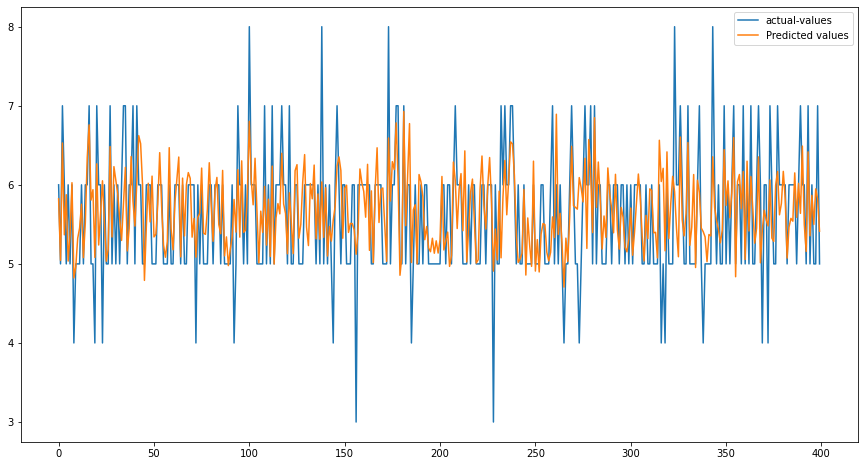

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual-values")
plt.plot([i for i in range(len(Y_test))],pred_test_lll, label="Predicted values")
plt.legend()
plt.show()

Lasso|Scatter plot

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+02, tolerance: 7.331e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+02, tolerance: 7.230e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.934e+02, tolerance: 7.049e-02

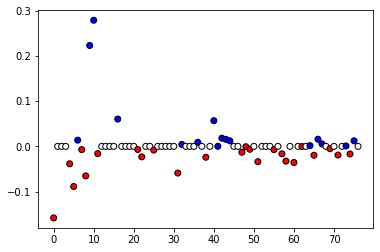

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, scale
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
param_grid = {'alpha': np.logspace(-3, 0, 14)}
lasso_regressor2 = GridSearchCV(lasso,parameters1, return_train_score=True, cv=10)
lasso_regressor2.fit(X_train,Y_train)
lasso = lasso_regressor2.best_estimator_
plt.scatter(range(X_poly.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')

Lasso| Mean of train and test sets

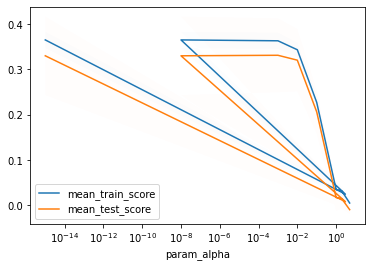

In [ ]:
results = pd.DataFrame(lasso_regressor.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.01)
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.01)
plt.legend()
plt.xscale("log")

### Lasso Regression White Wine

Visualized how the actual data values differs from the ones which we predicted.
With the value of alpha 1.0 the prediction is quite poor. Once we fit the vlaue after using GridSearchCV(1e-08) the prediction is almost perfect.

Aboe this one we plotter graph of different alpha values with MSE.

In [ ]:
from sklearn.linear_model import LassoCV
n_samples, n_features = 10, 5
X = wn_white[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
y = wn_white['quality']
X_train,X_test,Y_train, Y_test = train_test_split(X,y,
                                              random_state = 0) 
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, Y_train)
pred_train_ll= model_lasso.predict(X_train)
pred_test_ll= model_lasso.predict(X_test)  
print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_ll))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_ll)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_ll)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_ll)))

MSE 0.8539341767327165
MAE 0.6410863929770539
R^2|Train 0.04720568475254583
R^2|Test 0.02961896622669069


Lasso| Real and  predicted values comparasion


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+03, tolerance: 2.811e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.017e+02, tolerance: 2.811e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.611e+01, tolerance: 2.811e-01

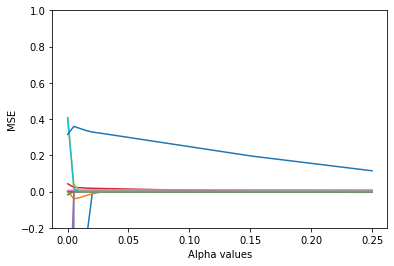

In [ ]:
alphas = np.linspace(0.0001,0.25)
lasso = Lasso(max_iter=5)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
ax = plt.gca(xlabel="Alpha values",ylabel="MSE",ylim=([-0.2,1]))
ax.plot(alphas, coefs)

Lasso|Alpha values comparasion

Text(0, 0.5, 'R^2')

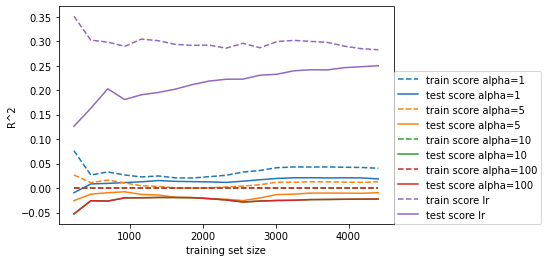

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Lasso(alpha=1), "alpha=1")
plot_learning_curve(Lasso(alpha=5), "alpha=5")
plot_learning_curve(Lasso(alpha=10), "alpha=10")
plot_learning_curve(Lasso(alpha=100), "alpha=100")
plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

Lasso|GridSearchCV

In [ ]:
lasso = Lasso()
parameters1 = {'alpha':[1e-15,13-10,1e-8,1e-3,1e-2,1e-1,1,2,5]}
lasso_regressor = GridSearchCV(lasso,parameters1,return_train_score=True)
lasso_regressor.fit(X_train,Y_train)


print("GridSearchCV on training set")
print(str(lasso_regressor.best_params_))
print(lasso_regressor.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.448e+02, tolerance: 2.237e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.097e+02, tolerance: 2.285e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.433e+02, tolerance: 2.234e-01

GridSearchCV on training set
{'alpha': 1e-08}
0.28304301944154764


Lasso|Tunned model

In [ ]:
model_lasso1 = Lasso(alpha = 1e-08)
model_lasso1.fit(X_train, Y_train) 

pred_train_lll= model_lasso1.predict(X_train)
pred_test_lll= model_lasso1.predict(X_test)  
print("MSE " + str(np.sqrt(mean_squared_error(Y_train,pred_train_lll))))
print("MAE " + str(mean_absolute_error(Y_train, pred_train_lll)))
print("R^2|Train "+ str(r2_score(Y_train, pred_train_lll)))
print("R^2|Test "+ str(r2_score(Y_test, pred_test_lll)))

MSE 0.736276161070697
MAE 0.5737019638155196
R^2|Train 0.29167618335961576
R^2|Test 0.24380805245782766


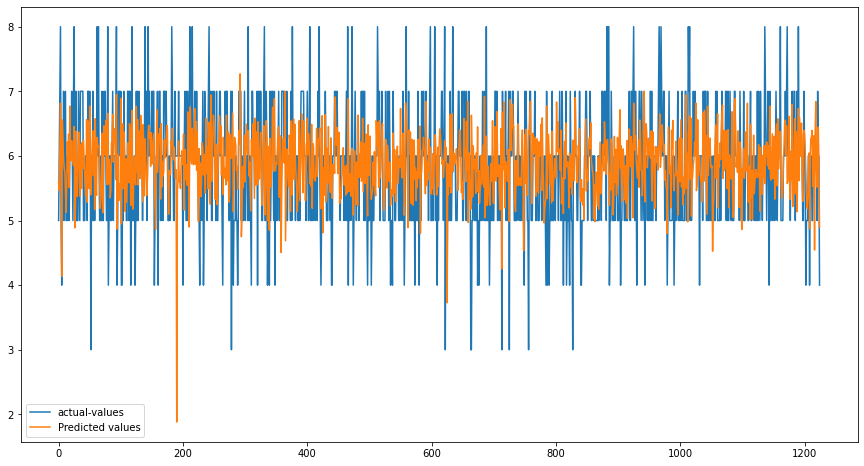

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual-values")
plt.plot([i for i in range(len(Y_test))],pred_test_lll, label="Predicted values")
plt.legend()
plt.show()

Lasso|Scatter plot

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.887e+02, tolerance: 2.547e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+02, tolerance: 2.501e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.026e+02, tolerance: 2.556e-01

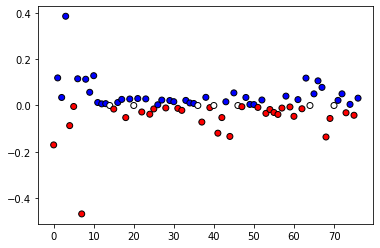

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, scale
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
param_grid = {'alpha': np.logspace(-3, 0, 14)}
lasso_regressor2 = GridSearchCV(lasso,parameters1, return_train_score=True, cv=10)
lasso_regressor2.fit(X_train,Y_train)
lasso = lasso_regressor2.best_estimator_
plt.scatter(range(X_poly.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')

Lasso| Mean of train and test sets

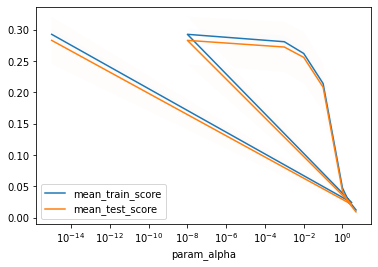

In [ ]:
results = pd.DataFrame(lasso_regressor.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.01)
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.01)
plt.legend()
plt.xscale("log")

### Elastic net regression

Increasing value of l1_ratio will slighly(almost not noticable) **increase the R^2 **

In [ ]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 1,l1_ratio=0.5)
model_enet.fit(X, y) 
X_train,X_test,Y_train, Y_test = train_test_split(X,y,
                                              random_state = 0)
pred_train_enet= model_enet.predict(X_train)
pred_test_enet= model_enet.predict(X_test)

print(r2_score(Y_train, pred_train_enet))
print(r2_score(Y_test, pred_test_enet))
#0.3532649118687373 for 1 
# 0.3533856706289574 for 0.001

0.053191618260493456
0.033627778572796974


Conclusion on tunning the ElasticNetCV

Using RepeatedKFold package, we checked for necessary of using cross-validation in the ElasticNetCV model. Without implementing cross-validation the MAE is smaller.

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV

cv = RepeatedKFold(n_splits = 5,n_repeats = 3)

#TEST NO.1
model_e = ElasticNet()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,2,5],'l1_ratio':[0.001,0.01,0.1,0.3,0.6,0.7,1]}
search = GridSearchCV(model_e,param_grid = parameters)
results = search.fit(X,y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

#TEST NO.2 with C-V
model_e = ElasticNet()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,2,5],'l1_ratio':[0.001,0.01,0.1,0.3,0.6,0.7,1]}
search = GridSearchCV(model_e,param_grid = parameters,cv=cv)
results = search.fit(X,y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+03, tolerance: 2.986e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+03, tolerance: 3.020e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+03, tolerance: 3.051e-01

MAE: 0.246
Config: {'alpha': 1e-08, 'l1_ratio': 0.001}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+03, tolerance: 3.040e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+03, tolerance: 3.052e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+03, tolerance: 3.121e-01

MAE: 0.273
Config: {'alpha': 1e-08, 'l1_ratio': 0.001}


ElasticNetCV|

In this case we checked values of l1_ratio and alpha and we can say that MAE is better in case of test set data

---



In [ ]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV(l1_ratio = [0,0.1,1],alphas = [1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,2,5])
model.fit(X_train,Y_train)
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

MAE = mean_absolute_error(Y_test,test_predictions)
MSE = mean_squared_error(Y_test,test_predictions)
MAE1 = mean_absolute_error(Y_train,train_predictions)
MSE1 = mean_squared_error(Y_train,train_predictions)
R2 = r2_score(Y_train,train_predictions)
print(R2)
print(MAE)
print(MSE)
print(model.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1010.2141611066861, tolerance: 0.22372270251872
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977.5112749768452, tolerance: 0.2237

0.29165330983297466
0.6166429292242064
0.6317550455739548
[-1.81882418e+00  1.08799261e-01 -1.84998870e-02  9.32089122e-02
 -5.49037603e-01 -2.57924993e-04  4.79970728e-03 -1.89074779e+02
  8.48991180e-01  6.14703712e-01  1.42316913e-01]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.963e+02, tolerance: 2.811e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Cross validation|Kfold

In [ ]:
from numpy import mean
from numpy import sqrt
from numpy import absolute
from numpy import std

X = wn_red[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
y = wn_red['quality']

cv = KFold(n_splits=5,shuffle= True)
model = LinearRegression()

scores = cross_val_score(model,X,y)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.290 (0.084)


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
model.fit(X, y)
print('alpha: %f' %model.alpha_)
print('l1_ratio_: %f' %model.l1_ratio_)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302.62687512246987, tolerance: 0.09358290479499651
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the num

alpha: 0.000100
l1_ratio_: 0.000000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.14324040969154, tolerance: 0.09260917303683115
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.3066265647436, tolerance: 0.0

In [ ]:
X = wn_red[["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]]
y = wn_red['quality']

model = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.505
Config: {'alpha': 0.0001, 'l1_ratio': 0.0}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.338e+02, tolerance: 1.042e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
